In [1]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

In [2]:
img = Image.open('images/kasago001.png', 'r')

In [3]:
img.show()

In [4]:
print(img.format, img.size, img.mode)

PNG (283, 143) RGBA


In [5]:
from __future__ import print_function
import os, sys
from PIL import Image

size = (128, 128)

try:
    outfile =  "images/kasago001min.jpg"
    im = Image.open('images/kasago001.png', 'r')
    im.thumbnail(size)
    im.save(outfile, "JPEG")
except IOError:
    print("cannot create thumbnail for", infile)

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [7]:
img = cv2.imread('images/kasago002.png',0)
edges = cv2.Canny(img, 50, 200)
cv2.imwrite("images/kasago002_edge.png", edges)

True

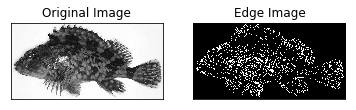

True

In [8]:
img = cv2.imread('images/kasago002.png',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
cv2.imwrite("images/kasago002_edge.png", edges)

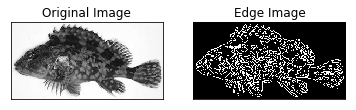

True

In [11]:
img = cv2.imread('images/kasago001.png',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
cv2.imwrite("images/kasago001_edge.png", edges)

In [9]:
len(edges)

419

In [10]:
len(edges[0])

832

In [13]:
import math


In [14]:
import numpy as np
l_2d = [[0, 1], [3, 4]]

In [15]:
rotate_matrix = lambda radian, x_t, y_t : [[math.cos(radian), math.sin(radian), x_t], 
                                           [-math.sin(radian), math.cos(radian), y_t]]
def dot_gen(map_matrix):    
    return lambda x: np.dot(map_matrix, x)

In [16]:
afintrans = dot_gen(rotate_matrix(math.radians(-10), 30, 10))

In [21]:
def afin_image(afintrans, image, x_length, y_length, ):
    afin_result = np.zeros((y_length, x_length))
    for y in range(len(image)):
        for x in range(len(image[y])):
            if image[y][x] == 0:
                continue
            trans_posi = afintrans([[x],[y],[1]])
            new_x = math.floor(trans_posi[0][0])
            new_y = math.floor(trans_posi[1][0])
            if new_x >= 0 and new_x < x_length and new_y >= 0 and new_y < y_length:
                afin_result[new_y][new_x] = image[y][x]
    return afin_result

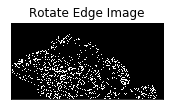

True

In [22]:
rows,cols = edges.shape
afin_result = afin_image(afintrans, edges, cols, rows)
plt.subplot(122),plt.imshow(afin_result,cmap = 'gray')
plt.title('Rotate Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
cv2.imwrite("images/kasago002_rotate.png", afin_result)

In [19]:
radian = math.radians(-10)
rows,cols = edges.shape

afin_matrix = np.float32([[math.cos(radian), math.sin(radian), 30], 
  [-math.sin(radian), math.cos(radian), 10]])
dst = cv2.warpAffine(edges,afin_matrix,(cols,rows))

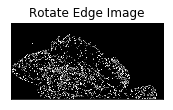

True

In [20]:
plt.subplot(122),plt.imshow(dst,cmap = 'gray')
plt.title('Rotate Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
cv2.imwrite("images/kasago003_rotate.png", afin_result)